In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

/Users/alara/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
file = pd.read_csv('trainTitanic.csv')
#test = pd.read_csv('test.csv')

In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Replace sex with binary indicator

In [8]:
sex = []

for s in file['Sex']:
    if s == 'male':
        sex.append(1)
    else:
        sex.append(0)
        
file['Sex'] = sex


In [9]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


## Find fare per individual and replace 0's with estimated fares

In [14]:
count = file.groupby('Embarked').count()
print(count)

          PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Embarked                                                                        
C                 168       168     168   168  168  130    168    168     168   
Q                  77        77      77    77   77   28     77     77      77   
S                 644       644     644   644  644  554    644    644     644   

          Fare  Cabin  
Embarked               
C          168     69  
Q           77      4  
S          644    129  


In [12]:
file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [10]:
count = file.groupby('Ticket').count()
count = count.reset_index()
price = train.groupby('Ticket').max()
price = price.reset_index()
Fare2 = count[['Ticket','PassengerId']].merge(price[['Ticket','Fare']],on='Ticket',how='inner')
Fare2['Fare2'] = Fare2['Fare']/Fare2['PassengerId']
Fare2['Tickettotal'] = Fare2['PassengerId']
train = train.merge(Fare2[['Fare2','Ticket','Tickettotal']],on='Ticket',how='inner')

In [11]:
trainfare3 = train[(train['Embarked']=='S')&(train['Pclass']==3)]['Fare2'].mean()
trainfare2 = train[(train['Embarked']=='S')&(train['Pclass']==2)]['Fare2'].mean()
trainfare1 = train[(train['Embarked']=='S')&(train['Pclass']==1)]['Fare2'].mean()

Fare3 = []

for i in range(len(train)):
    if train['Fare2'][i] != 0:
        Fare3.append(train['Fare2'][i])
    elif train['Fare2'][i] == 0 and train['Pclass'][i] == 1:
        Fare3.append(trainfare1)
    elif train['Fare2'][i] == 0 and train['Pclass'][i] == 2:
        Fare3.append(trainfare2)
    elif train['Fare2'][i] == 0 and train['Pclass'][i] == 3:
        Fare3.append(trainfare3)
    
train['Fare2'] = Fare3

In [12]:
count = test.groupby('Ticket').count()
count = count.reset_index()
price = test.groupby('Ticket').max()
price = price.reset_index()
Fare2 = count[['Ticket','PassengerId']].merge(price[['Ticket','Fare']],on='Ticket',how='inner')
Fare2['Fare2'] = Fare2['Fare']/Fare2['PassengerId']
test = test.merge(Fare2[['Fare2','Ticket','PassengerId']],on='Ticket',how='inner')

In [13]:
train['fare-class'] = train['Fare2']*train['Pclass']

In [14]:
testfare3 = test[(test['Embarked']=='S')&(test['Pclass']==3)]['Fare2'].mean()
testfare2 = test[(test['Embarked']=='S')&(test['Pclass']==2)]['Fare2'].mean()
testfare1 = test[(test['Embarked']=='S')&(test['Pclass']==1)]['Fare2'].mean()

Fare3 = []

for i in range(len(test)):
    if test['Fare2'][i] != 0:
        Fare3.append(test['Fare2'][i])
    elif test['Fare2'][i] == 0 and test['Pclass'][i] == 1:
        Fare3.append(testfare1)
    elif test['Fare2'][i] == 0 and test['Pclass'][i] == 2:
        Fare3.append(testfare2)
    elif test['Fare2'][i] == 0 and test['Pclass'][i] == 3:
        Fare3.append(testfare3)
    
test['Fare2'] = Fare3

## Creat FamilySize feature

In [15]:
train['FamilySize'] = train['SibSp'] + train['Parch'] 
test['FamilySize'] = test['SibSp'] + test['Parch'] 

## Estimate Age for missing values

In [16]:
masterage = sum(train[(train['Name'].str.contains("Master"))&
                      (train['Age'].isnull()==False)&(train['Sex']==1)]['Age'])/len(train[(train['Name'].str.contains("Master"))&
                                                                         (train['Age'].isnull()==False)&(train['Sex']==1)])
train[(train['Name'].str.contains("Master"))&(train['Sex']==1)] = train[(train['Name'].str.contains("Master"))&(train['Sex']==1)].fillna(value=round(masterage))

missage = sum(train[(train['Name'].str.contains("Miss."))&
                    (train['Age'].isnull()==False)&(train['Sex']==0)]['Age'])/len(train[(train['Name'].str.contains("Miss."))&
                                                                      (train['Age'].isnull()==False)&(train['Sex']==0)])
train[(train['Name'].str.contains("Miss."))&(train['Sex']==0)] = train[(train['Name'].str.contains("Miss."))&(train['Sex']==0)].fillna(value=round(missage))

mrsage = sum(train[(train['Name'].str.contains("Mrs."))&
                    (train['Age'].isnull()==False)&(train['Sex']==0)]['Age'])/len(train[(train['Name'].str.contains("Mrs."))&
                                                                      (train['Age'].isnull()==False)&(train['Sex']==0)])
train[(train['Name'].str.contains("Mrs."))&(train['Sex']==0)] = train[(train['Name'].str.contains("Mrs."))&(train['Sex']==0)].fillna(value=round(mrsage))

mrage = sum(train[(train['Name'].str.contains("Mr."))&
                    (train['Age'].isnull()==False)&(train['Sex']==1)]['Age'])/len(train[(train['Name'].str.contains("Mr."))&
                                                                      (train['Age'].isnull()==False)&(train['Sex']==1)])

train[(train['Name'].str.contains("Mr."))&(train['Sex']==1)] = train[(train['Name'].str.contains("Mr."))&(train['Sex']==1)].fillna(value=round(mrage))

drage = sum(train[(train['Name'].str.contains("Dr."))&
                    (train['Age'].isnull()==False)]['Age'])/len(train[(train['Name'].str.contains("Dr."))&
                                                                      (train['Age'].isnull()==False)])
train[(train['Name'].str.contains("Dr."))] = train[(train['Name'].str.contains("Dr."))].fillna(value=round(drage))

In [17]:
masterage = sum(test[(test['Name'].str.contains("Master"))&
                      (test['Age'].isnull()==False)&(test['Sex']==1)]['Age'])/len(test[(test['Name'].str.contains("Master"))&
                                                                         (test['Age'].isnull()==False)&(test['Sex']==1)])
test[(test['Name'].str.contains("Master"))&(test['Sex']==1)] = test[(test['Name'].str.contains("Master"))&(test['Sex']==1)].fillna(value=round(masterage))

missage = sum(test[(test['Name'].str.contains("Miss."))&
                    (test['Age'].isnull()==False)&(test['Sex']==0)]['Age'])/len(test[(test['Name'].str.contains("Miss."))&
                                                                      (test['Age'].isnull()==False)&(test['Sex']==0)])
test[(test['Name'].str.contains("Miss."))&(test['Sex']==0)] = test[(test['Name'].str.contains("Miss."))&(test['Sex']==0)].fillna(value=round(missage))

mrsage = sum(test[(test['Name'].str.contains("Mrs."))&
                    (test['Age'].isnull()==False)&(test['Sex']==0)]['Age'])/len(test[(test['Name'].str.contains("Mrs."))&
                                                                      (test['Age'].isnull()==False)&(test['Sex']==0)])
test[(test['Name'].str.contains("Mrs."))&(test['Sex']==0)] = test[(test['Name'].str.contains("Mrs."))&(test['Sex']==0)].fillna(value=round(mrsage))

mrage = sum(test[(test['Name'].str.contains("Mr."))&
                    (test['Age'].isnull()==False)&(test['Sex']==1)]['Age'])/len(test[(test['Name'].str.contains("Mr."))&
                                                                      (test['Age'].isnull()==False)&(test['Sex']==1)])

test[(test['Name'].str.contains("Mr."))&(test['Sex']==1)] = test[(test['Name'].str.contains("Mr."))&(test['Sex']==1)].fillna(value=round(mrage))

drage = sum(test[(test['Name'].str.contains("Dr."))&
                    (test['Age'].isnull()==False)]['Age'])/len(test[(test['Name'].str.contains("Dr."))&
                                                                      (test['Age'].isnull()==False)])
test[(test['Name'].str.contains("Dr."))] = test[(test['Name'].str.contains("Dr."))].fillna(value=round(drage))
test[(test['Name'].str.contains("Ms."))] = test[(test['Name'].str.contains("Ms."))].fillna(value=round(mrsage))

## Model

In [407]:
cols = ['PassengerId','Sex','Age','Pclass','Fare2','FamilySize']

In [408]:
X = train[cols]
X = X.set_index('PassengerId')
y = train[['PassengerId','Survived']]
y = y.set_index('PassengerId')

In [409]:
#X_train = train[cols]
#X_train = X_train.set_index('PassengerId')
#X_test = test[cols]
#X_test = X_test.set_index('PassengerId')
#y_train = train[['PassengerId','Survived']]
#y_train = y_train.set_index('PassengerId')

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [430]:
model = RandomForestClassifier(n_estimators = 50)
model.fit(X_train,y_train['Survived'].values)
predictions = model.predict(X_test)
sum(predictions), sum(y_test['Survived'].values)

(77, 86)

In [431]:
print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

print(accuracy_score(y_test,predictions))

[[127  10]
 [ 19  67]]
             precision    recall  f1-score   support

          0       0.87      0.93      0.90       137
          1       0.87      0.78      0.82        86

avg / total       0.87      0.87      0.87       223

0.869955156951


In [291]:
for i in range(1,len(cols)):
    print cols[i],model.feature_importances_[i-1]*100,'%'

Sex 26.6706156494 %
FamilySize 9.01868823107 %
Age 26.1224027861 %
Pclass 7.78777858259 %
Fare2 30.4005147509 %


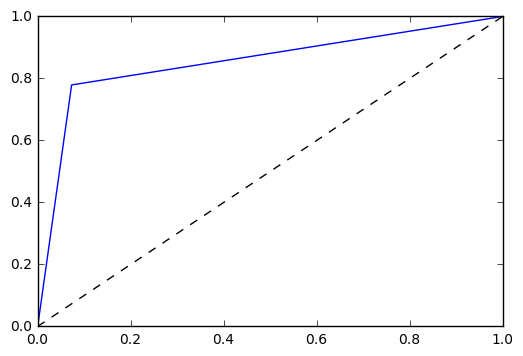

In [292]:
x, y, _ = roc_curve(y_test, predictions)
plt.plot(x,y)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [18]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2,Tickettotal,fare-class,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,32,S,7.250000,1,21.750000,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,71.283300,1,71.283300,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,22,S,7.925000,1,23.775000,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,26.550000,2,26.550000,1
4,138,0,1,"Futrelle, Mr. Jacques Heath",1,37.0,1,0,113803,53.1000,C123,S,26.550000,2,26.550000,1
5,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,32,S,8.050000,1,24.150000,0
6,6,0,3,"Moran, Mr. James",1,32.0,0,0,330877,8.4583,32,Q,8.458300,1,25.374900,0
7,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,51.862500,1,51.862500,0
8,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,5,S,5.268750,4,15.806250,4
9,25,0,3,"Palsson, Miss. Torborg Danira",0,8.0,3,1,349909,21.0750,22,S,5.268750,4,15.806250,4
